In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

In [51]:
datasets = {
    "No encoded columns": "content/combined_data_none_encoded.csv",
    "No encoded columns except year, binned actor_age and actor gender": "content/combined_data_not_encoded.csv",
    "Encoding top 10 categories with over 50% represented": "content/combined_data_all_encoded_10.csv",
    "Encoding top 100 categories with over 50% represented": "content/combined_data_all_encoded_100.csv",
    "Encoding top 500 categories with over 50% represented": "content/combined_data_all_encoded_500.csv",
    "Encoding list top 10 categories": "content/combined_data_all_list_encoded_10.csv",
    "Encoding list top 100 categories": "content/combined_data_all_list_encoded_100.csv"
}

In [52]:
maes = []

for desc, fp in datasets.items():
    df = pd.read_csv(fp)
    print("\n" + fp)

    y = df["weighted_average_vote"].astype(float)
    
    df = df.drop(["weighted_average_vote"], axis=1)

    if "imdb_title_id" in df.columns:
        X = df.drop(
            ["imdb_title_id", "title"],
            axis=1,
        ).astype(float)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    dim = X.shape[1]

    # define the keras model
    model = Sequential()
    model.add(
        Dense(dim * 2, input_dim=dim, activation="relu", kernel_initializer="he_normal")
    )
    model.add(Dense(dim, activation="sigmoid", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(1, activation="linear"))

    model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

    hist = model.fit(
        X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test)
    ).history

    yhat = model.predict(X_test)
    error = mean_absolute_error(y_test, yhat)
    print("\n" + desc)

    maes.append(hist)

    print("MAE: %.3f\n" % error)


content/combined_data_none_encoded.csv
Epoch 1/10
74/74 [==============================] - 1s 3ms/step - loss: 29.0531 - mse: 29.0531 - mae: 5.2373 - val_loss: 23.7099 - val_mse: 23.7099 - val_mae: 4.7092
Epoch 2/10
74/74 [==============================] - 0s 2ms/step - loss: 19.1150 - mse: 19.1150 - mae: 4.1794 - val_loss: 13.8890 - val_mse: 13.8890 - val_mae: 3.5232
Epoch 3/10
74/74 [==============================] - 0s 1ms/step - loss: 9.9107 - mse: 9.9107 - mae: 2.8952 - val_loss: 6.0548 - val_mse: 6.0548 - val_mae: 2.2164
Epoch 4/10
74/74 [==============================] - 0s 2ms/step - loss: 4.1047 - mse: 4.1047 - mae: 1.7519 - val_loss: 2.5343 - val_mse: 2.5343 - val_mae: 1.3366
Epoch 5/10
74/74 [==============================] - 0s 2ms/step - loss: 2.1260 - mse: 2.1260 - mae: 1.1937 - val_loss: 1.7640 - val_mse: 1.7640 - val_mae: 1.0578
Epoch 6/10
74/74 [==============================] - 0s 2ms/step - loss: 1.7182 - mse: 1.7182 - mae: 1.0400 - val_loss: 1.5836 - val_mse: 1.583

Epoch 9/10
74/74 [==============================] - 0s 6ms/step - loss: 0.4831 - mse: 0.4831 - mae: 0.5102 - val_loss: 1.0051 - val_mse: 1.0051 - val_mae: 0.7692
Epoch 10/10
74/74 [==============================] - 0s 6ms/step - loss: 0.4233 - mse: 0.4233 - mae: 0.4692 - val_loss: 1.0605 - val_mse: 1.0605 - val_mae: 0.8006

Encoding top 500 categories with over 50% represented
MAE: 0.801


content/combined_data_all_list_encoded_10.csv
Epoch 1/10
74/74 [==============================] - 1s 9ms/step - loss: 3.5952 - mse: 3.5952 - mae: 1.3343 - val_loss: 1.0578 - val_mse: 1.0578 - val_mae: 0.7980
Epoch 2/10
74/74 [==============================] - 0s 5ms/step - loss: 1.0395 - mse: 1.0395 - mae: 0.7771 - val_loss: 0.9596 - val_mse: 0.9596 - val_mae: 0.7623
Epoch 3/10
74/74 [==============================] - 0s 5ms/step - loss: 0.9517 - mse: 0.9517 - mae: 0.7441 - val_loss: 0.9210 - val_mse: 0.9210 - val_mae: 0.7398
Epoch 4/10
74/74 [==============================] - 0s 6ms/step - loss: 0.8

file: none encoded - MAE: 0.883
file: less encoded - MAE: 0.795
file: all encoded 10 - MAE: 0.753
file: all encoded 100 - MAE: 0.767
file: all encoded 500 - MAE: 0.801
file: list encoded top 10 - MAE: 0.739
file: list encoded top 100 - MAE: 0.762


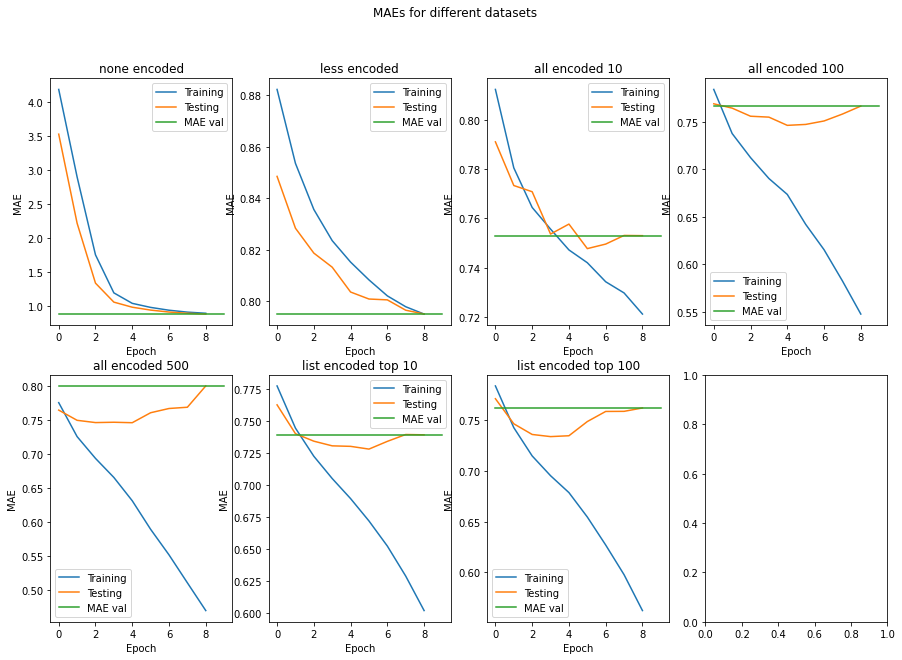

In [61]:
from matplotlib.ticker import FormatStrFormatter

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(15, 10)
plt.suptitle("MAEs for different datasets")

axs = axs.flatten()

titles = [
    "none encoded",
    "less encoded",
    "all encoded 10",
    "all encoded 100",
    "all encoded 500",
    "list encoded top 10",
    "list encoded top 100",
]

for i, hist in enumerate(maes):
    mae_val = hist["val_mae"][9]

    axs[i].plot(hist["mae"][1:])
    axs[i].plot(hist["val_mae"][1:])
    axs[i].plot([mae_val for i in range(10)])
    axs[i].legend(["Training", "Testing", "MAE val"])
    axs[i].set_title(titles[i])
    axs[i].set_ylabel("MAE")
    axs[i].set_xlabel("Epoch")

    print(f"file: {titles[i]} - MAE: {mae_val:.3f}")

plt.savefig("datasetMAEs.png", bbox_inches="tight", facecolor="white")
plt.show()

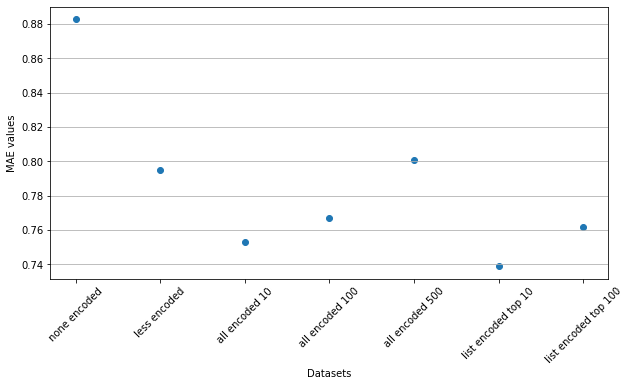

In [59]:
mae_vals = [h["val_mae"][9] for h in maes]

plt.scatter(
    titles,
    mae_vals
)
plt.grid(b=True, axis="y")
plt.xlabel("Datasets")
plt.ylabel("MAE values")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 5, forward=True)